- Julia Noriko 
- Murilo Holtz Foltran

# Projeto 05 - Epidemiologia Em Rede

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import string
import scipy.integrate 

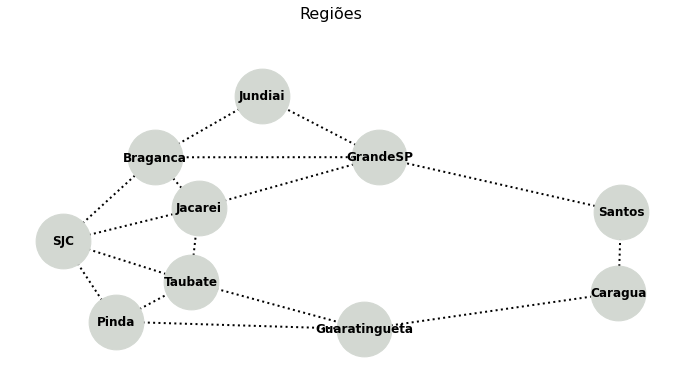

In [ ]:
G=nx.Graph()

cities = ['SJC',
          'Pinda',
          'Taubate', 
          'Guaratingueta', 
          'Caragua',
          'Jacarei',
          'Santos',
          'Braganca',
          'GrandeSP',
          'Jundiai']

G.add_nodes_from(cities)

conexoes = [('SJC', 'Pinda'),
            ('SJC', 'Taubate'),
            ('SJC', 'Braganca'), 
            ('SJC', 'Jacarei'), 
            ('Pinda', 'Taubate'), 
            ('Pinda', 'Guaratingueta'), 
            ('Taubate', 'Jacarei'), 
            ('Taubate', 'Guaratingueta'), 
            ('Braganca', 'GrandeSP'), 
            ('Braganca', 'Jundiai'), 
            ('Jundiai', 'GrandeSP'), 
            ('GrandeSP', 'Santos'), 
            ('Santos', 'Caragua'), 
            ('Guaratingueta', 'Caragua'), 
            ('Jacarei', 'Braganca'), 
            ('Jacarei', 'GrandeSP')]

G.add_edges_from(conexoes)

options = {
    'node_color': '#D3D8D2',
    'node_size': 3000,
    'width': 2,
    'edge_color': 'black',
    'font_weight': 'bold',
    'font_size': 12,
    'style': 'dotted',
    }

plt.figure(figsize=(12, 6))
plt.margins(x=0.1, y=0.2)
plt.suptitle('Regiões', fontsize=16)
nx.draw(G, with_labels=True, **options)
plt.show() # display

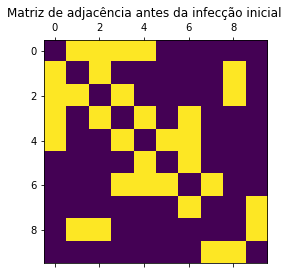

In [ ]:
#Definição das conexões entre as 10 regiões
matriz = np.zeros((10,10), dtype=int)

SJC = 0
Pinda = 1
Taubate = 2
Jacarei = 3
Braganca = 4
Jundiai = 5
GrandeSP = 6
Santos = 7
Guaratingueta = 8
Caragua = 9

arrayConexoes = [(0, 1), (0, 2), (0, 4), (0, 3), 
                (1, 2), (1, 8), (2, 3), (2, 8), 
                (4, 6), (4, 5), (5, 6), (6, 7), 
                (7, 9), (8, 9), (3, 4), (3, 6)]

for i in range(0, len(arrayConexoes)):
  cit = arrayConexoes[i]
  cit1 = cit[0]
  cit2 = cit[1]
  matriz[cit1, cit2] = 1
  matriz[cit2, cit1] = 1


plt.matshow(matriz)
plt.suptitle('Matriz de adjacência antes da infecção inicial')
plt.show()

In [ ]:
#Array de população inicial de cada região (indice)
#(sucetivel, infectada, recuperado) 
N=0
inicial = [(1000, 0, 0), #SJC(0) - inicio da infecção
          (210, 0, 0), #Pinda(1)
          (400, 20, 0), #Taubaté(2)
          (230, 0, 0), #Jacareí(3)
          (190, 0, 0), #Bragança(4)
          (700, 0, 0), #Jundiaí(5)
          (5000, 0, 0), #GrandeSP(6)
          (850, 0, 0), #Santos(7)
          (200, 0, 0), #Guaratinguetá(8)
          (150, 0, 0)] #Caraguá(9)

for i in range(0, len(inicial)):
  populacaoInicial = inicial[i] 
  sucetivel = populacaoInicial[0]
  infectado = populacaoInicial[1]
  recuperado = populacaoInicial[2]
  N += sucetivel+infectado+recuperado

#Array com taxa de infecção(r), recuperação(a), migração(m) por região
#(r, a, m)


taxa = [(0.6, 0.2, 0.4, 0.5), #SJC(0) m1=pinda, m2=taubate, m3=jacarei, m4=braganca
        (0.8, 0.1, 0.5, 0.3), #Pinda(1)
        (0.2, 0.6, 0.6, 0.1), #Taubaté(2)
        (0.4, 0.15, 0.4, 0.3), #Jacareí(3)
        (0.5, 0.2, 0.4, 0.4), #Bragança(4)
        (0.9, 0.8, 0.1, 0.3), #Jundiaí(5)
        (0.7, 0.7, 0.8, 0.6), #GrandeSP(6)
        (0.4, 0.1, 0.3, 0.3), #Santos(7)
        (1, 0.3, 0.5, 0.4), #Guaratinguetá(8)
        (0.6, 0.3, 0.6, 0.5)] #Caraguá(9)

m3 = [0.4, 0.6, 0.7, 0.2, 0.3, 0.5, 0.4]
m4 = [0.6, 0.8, 0.1, 0.5, 0.8]

## Propagação da infecção partindo da região de Taubaté (Vértice 2) 

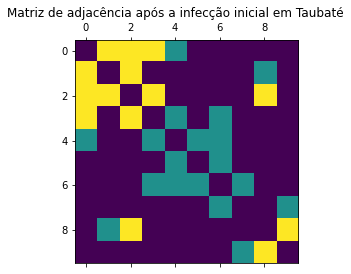

In [ ]:
#Espalhar a infecção

Z = 10 #numero de vértices
T = 10
prob = 0.5
posicao = 2 #Vértice Taubate
estado = np.zeros((Z), dtype=int)

estado[posicao]=2

for t in range(1,T):
    new_estado = np.zeros((Z), dtype=int)
    for n in range(Z):
     
        indices = np.where(matriz[n,:]==1)[0] # lista de adjacência nó n
        viz_contaminado = False
        for idx in indices:
            if estado[idx] == 2: # vizinho está doente
                matriz[n][idx] = 2
                matriz[idx][n] = 2
                viz_contaminado = True
                break

        if n==0:  
          if np.random.random_sample()<=taxa[0][2] and viz_contaminado: # chance de contágio    
            matriz[n][1] = 2
            matriz[1][n] = 2
          elif np.random.random_sample()<=taxa[0][3] and viz_contaminado: # chance de contágio    
            matriz[n][2] = 2
            matriz[2][n] = 2
          elif np.random.random_sample()<=m3[0] and viz_contaminado: # chance de contágio    
            matriz[n][3] = 2
            matriz[3][n] = 2 
          elif np.random.random_sample()<=m4[0] and viz_contaminado: # chance de contágio    
            matriz[n][4] = 2
            matriz[4][n] = 2
        elif n==1:
          if np.random.random_sample()<=taxa[1][2] and viz_contaminado: # chance de contágio    
            matriz[n][0] = 2
            matriz[0][n] = 2
          elif np.random.random_sample()<=taxa[1][3] and viz_contaminado: # chance de contágio    
            matriz[n][2] = 2
            matriz[2][n] = 2
          elif np.random.random_sample()<=m3[1] and viz_contaminado: # chance de contágio    
            matriz[n][8] = 2
            matriz[8][n] = 2 
        elif n==2:
          if np.random.random_sample()<=taxa[2][2] and viz_contaminado: # chance de contágio    
            matriz[n][0] = 2
            matriz[0][n] = 2
          elif np.random.random_sample()<=taxa[2][3] and viz_contaminado: # chance de contágio    
            matriz[n][1] = 2
            matriz[1][n] = 2
          elif np.random.random_sample()<=m3[2] and viz_contaminado: # chance de contágio    
            matriz[n][3] = 2
            matriz[3][n] = 2 
          elif np.random.random_sample()<=m4[1] and viz_contaminado: # chance de contágio    
            matriz[n][8] = 2
            matriz[8][n] = 2 
        elif n==3:
          if np.random.random_sample()<=taxa[3][2] and viz_contaminado: # chance de contágio    
            matriz[n][0] = 2
            matriz[0][n] = 2
          elif np.random.random_sample()<=taxa[3][3] and viz_contaminado: # chance de contágio    
            matriz[n][2] = 2
            matriz[2][n] = 2
          elif np.random.random_sample()<=m3[3] and viz_contaminado: # chance de contágio    
            matriz[n][4] = 2
            matriz[4][n] = 2 
          elif np.random.random_sample()<=m4[2] and viz_contaminado: # chance de contágio    
            matriz[n][6] = 2
            matriz[6][n] = 2 
        elif n==4:
          if np.random.random_sample()<=taxa[4][2] and viz_contaminado: # chance de contágio    
            matriz[n][0] = 2
            matriz[0][n] = 2
          elif np.random.random_sample()<=taxa[4][3] and viz_contaminado: # chance de contágio    
            matriz[n][3] = 2
            matriz[3][n] = 2
          elif np.random.random_sample()<=m3[4] and viz_contaminado: # chance de contágio    
            matriz[n][5] = 2
            matriz[5][n] = 2 
          elif np.random.random_sample()<=m4[3] and viz_contaminado: # chance de contágio    
            matriz[n][6] = 2
            matriz[6][n] = 2 
        elif n==5:
          if np.random.random_sample()<=taxa[5][2] and viz_contaminado: # chance de contágio    
            matriz[n][4] = 2
            matriz[4][n] = 2
          elif np.random.random_sample()<=taxa[5][3] and viz_contaminado: # chance de contágio    
            matriz[n][6] = 2
            matriz[6][n] = 2
        elif n==6:
          if np.random.random_sample()<=taxa[6][2] and viz_contaminado: # chance de contágio    
            matriz[n][3] = 2
            matriz[3][n] = 2
          elif np.random.random_sample()<=taxa[6][3] and viz_contaminado: # chance de contágio    
            matriz[n][4] = 2
            matriz[4][n] = 2
          elif np.random.random_sample()<=m3[5] and viz_contaminado: # chance de contágio    
            matriz[n][5] = 2
            matriz[5][n] = 2 
          elif np.random.random_sample()<=m4[4] and viz_contaminado: # chance de contágio    
            matriz[n][7] = 2
            matriz[7][n] = 2
        elif n==7:
          if np.random.random_sample()<=taxa[7][2] and viz_contaminado: # chance de contágio    
            matriz[n][6] = 2
            matriz[6][n] = 2
          elif np.random.random_sample()<=taxa[7][3] and viz_contaminado: # chance de contágio    
            matriz[n][9] = 2
            matriz[9][n] = 2
        elif n==8:
          if np.random.random_sample()<=taxa[8][2] and viz_contaminado: # chance de contágio    
            matriz[n][1] = 2
            matriz[1][n] = 2
          elif np.random.random_sample()<=taxa[8][3] and viz_contaminado: # chance de contágio    
            matriz[n][9] = 2
            matriz[9][n] = 2 
          elif np.random.random_sample()<=m3[6] and viz_contaminado: # chance de contágio    
            matriz[n][2] = 2
            matriz[2][n] = 2
        elif n==9:
          if np.random.random_sample()<=taxa[9][2] and viz_contaminado: # chance de contágio    
            matriz[n][7] = 2
            matriz[7][n] = 2
          elif np.random.random_sample()<=taxa[9][3] and viz_contaminado: # chance de contágio    
            matriz[n][8] = 2
            matriz[8][n] = 2 
    estado = new_estado
        
plt.matshow(matriz)
plt.suptitle('Matriz de adjacência após a infecção inicial em Taubaté')
plt.show()

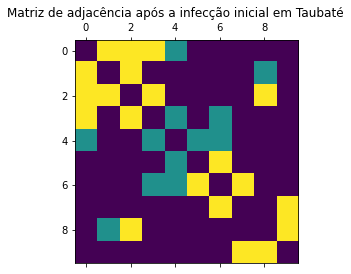

In [ ]:
#Espalhar a infecção

Z = 10 #numero de vértices
T = 10
prob = 0.5
posicao = 7 #Vértice Santos
estado = np.zeros((Z), dtype=int)

estado[posicao]=2

for t in range(1,T):
    new_estado = np.zeros((Z), dtype=int)
    for n in range(Z):
     
        indices = np.where(matriz[n,:]==1)[0] # lista de adjacência nó n
        viz_contaminado = False
        for idx in indices:
            if estado[idx] == 2: # vizinho está doente
                matriz[n][idx] = 2
                matriz[idx][n] = 2
                viz_contaminado = True
                break

        if n==0:  
          if np.random.random_sample()<=taxa[0][2] and viz_contaminado: # chance de contágio    
            matriz[n][1] = 2
            matriz[1][n] = 2
          elif np.random.random_sample()<=taxa[0][3] and viz_contaminado: # chance de contágio    
            matriz[n][2] = 2
            matriz[2][n] = 2
          elif np.random.random_sample()<=m3[0] and viz_contaminado: # chance de contágio    
            matriz[n][3] = 2
            matriz[3][n] = 2 
          elif np.random.random_sample()<=m4[0] and viz_contaminado: # chance de contágio    
            matriz[n][4] = 2
            matriz[4][n] = 2
        elif n==1:
          if np.random.random_sample()<=taxa[1][2] and viz_contaminado: # chance de contágio    
            matriz[n][0] = 2
            matriz[0][n] = 2
          elif np.random.random_sample()<=taxa[1][3] and viz_contaminado: # chance de contágio    
            matriz[n][2] = 2
            matriz[2][n] = 2
          elif np.random.random_sample()<=m3[1] and viz_contaminado: # chance de contágio    
            matriz[n][8] = 2
            matriz[8][n] = 2 
        elif n==2:
          if np.random.random_sample()<=taxa[2][2] and viz_contaminado: # chance de contágio    
            matriz[n][0] = 2
            matriz[0][n] = 2
          elif np.random.random_sample()<=taxa[2][3] and viz_contaminado: # chance de contágio    
            matriz[n][1] = 2
            matriz[1][n] = 2
          elif np.random.random_sample()<=m3[2] and viz_contaminado: # chance de contágio    
            matriz[n][3] = 2
            matriz[3][n] = 2 
          elif np.random.random_sample()<=m4[1] and viz_contaminado: # chance de contágio    
            matriz[n][8] = 2
            matriz[8][n] = 2 
        elif n==3:
          if np.random.random_sample()<=taxa[3][2] and viz_contaminado: # chance de contágio    
            matriz[n][0] = 2
            matriz[0][n] = 2
          elif np.random.random_sample()<=taxa[3][3] and viz_contaminado: # chance de contágio    
            matriz[n][2] = 2
            matriz[2][n] = 2
          elif np.random.random_sample()<=m3[3] and viz_contaminado: # chance de contágio    
            matriz[n][4] = 2
            matriz[4][n] = 2 
          elif np.random.random_sample()<=m4[2] and viz_contaminado: # chance de contágio    
            matriz[n][6] = 2
            matriz[6][n] = 2 
        elif n==4:
          if np.random.random_sample()<=taxa[4][2] and viz_contaminado: # chance de contágio    
            matriz[n][0] = 2
            matriz[0][n] = 2
          elif np.random.random_sample()<=taxa[4][3] and viz_contaminado: # chance de contágio    
            matriz[n][3] = 2
            matriz[3][n] = 2
          elif np.random.random_sample()<=m3[4] and viz_contaminado: # chance de contágio    
            matriz[n][5] = 2
            matriz[5][n] = 2 
          elif np.random.random_sample()<=m4[3] and viz_contaminado: # chance de contágio    
            matriz[n][6] = 2
            matriz[6][n] = 2 
        elif n==5:
          if np.random.random_sample()<=taxa[5][2] and viz_contaminado: # chance de contágio    
            matriz[n][4] = 2
            matriz[4][n] = 2
          elif np.random.random_sample()<=taxa[5][3] and viz_contaminado: # chance de contágio    
            matriz[n][6] = 2
            matriz[6][n] = 2
        elif n==6:
          if np.random.random_sample()<=taxa[6][2] and viz_contaminado: # chance de contágio    
            matriz[n][3] = 2
            matriz[3][n] = 2
          elif np.random.random_sample()<=taxa[6][3] and viz_contaminado: # chance de contágio    
            matriz[n][4] = 2
            matriz[4][n] = 2
          elif np.random.random_sample()<=m3[5] and viz_contaminado: # chance de contágio    
            matriz[n][5] = 2
            matriz[5][n] = 2 
          elif np.random.random_sample()<=m4[4] and viz_contaminado: # chance de contágio    
            matriz[n][7] = 2
            matriz[7][n] = 2
        elif n==7:
          if np.random.random_sample()<=taxa[7][2] and viz_contaminado: # chance de contágio    
            matriz[n][6] = 2
            matriz[6][n] = 2
          elif np.random.random_sample()<=taxa[7][3] and viz_contaminado: # chance de contágio    
            matriz[n][9] = 2
            matriz[9][n] = 2
        elif n==8:
          if np.random.random_sample()<=taxa[8][2] and viz_contaminado: # chance de contágio    
            matriz[n][1] = 2
            matriz[1][n] = 2
          elif np.random.random_sample()<=taxa[8][3] and viz_contaminado: # chance de contágio    
            matriz[n][9] = 2
            matriz[9][n] = 2 
          elif np.random.random_sample()<=m3[6] and viz_contaminado: # chance de contágio    
            matriz[n][2] = 2
            matriz[2][n] = 2
        elif n==9:
          if np.random.random_sample()<=taxa[9][2] and viz_contaminado: # chance de contágio    
            matriz[n][7] = 2
            matriz[7][n] = 2
          elif np.random.random_sample()<=taxa[9][3] and viz_contaminado: # chance de contágio    
            matriz[n][8] = 2
            matriz[8][n] = 2 
    estado = new_estado
        
plt.matshow(matriz)
plt.suptitle('Matriz de adjacência após a infecção inicial em Taubaté')
plt.show()

## Definição do modelo SIR em cada uma das 10 regiões e a influência da migração de uma região em outra.

Definição de cada variável
* N: Número total de indivíduos de todas as regiões
* S: Pessoas suscetíveis da região
* I: Pessoas infectadas da região 
* IM: Pessoas infectadas que vieram de outra região
* R: Pessoas recuperadas da região e de outras regiões
* a: Taxa de recuperação
* r: Taxa de infecção
* m: Taxa de migração


In [ ]:
##definir equações
dT = 0.01
def ModeloSIR(y, t, r, a, m1, IM1, m2, IM2):
  S, I, R = y
  dS = (-r*S*(I+IM1*m1+IM2*m2))*dT
  dI = (r*S*(I+IM1*m1+IM2*m2)-a*(I+IM1*m1+IM2*m2))*dT
  dR = (a*(I+IM1*m1+IM2*m2))*dT
  return(dS, dI, dR)

##adicionar propabilidades

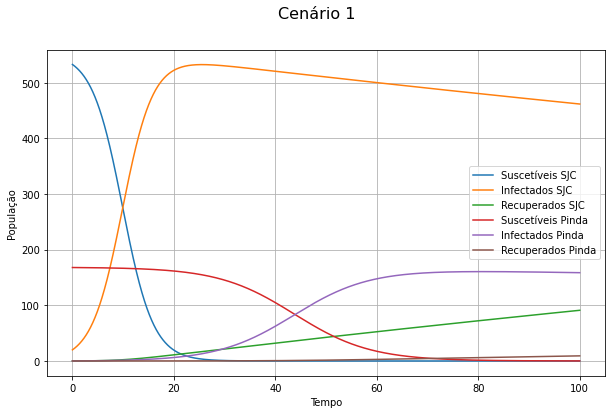

In [ ]:
t = np.linspace(0, 100, 10000)

IM1 = 0.7
IM2 = 0.4

s0 = scipy.integrate.odeint(ModeloSIR, [inicial[0][0], inicial[0][1], inicial[0][2]], t,
                           args=(taxa[0][0], taxa[0][1], taxa[1][1], IM1, taxa[2][1], IM2))

s0 = np.array(s0)

s1 = scipy.integrate.odeint(ModeloSIR, [inicial[1][0], inicial[1][1], inicial[1][2]], t,
                           args=(taxa[1][0], taxa[1][1], taxa[2][1], IM1, taxa[3][1], IM2))

s1 = np.array(s1)

plt.figure(figsize=[10,6])
plt.plot(t, s0[:,0], label="Suscetíveis SJC")
plt.plot(t, s0[:,1], label="Infectados SJC")
plt.plot(t, s0[:,2], label="Recuperados SJC")
plt.plot(t, s1[:,0], label="Suscetíveis Pinda")
plt.plot(t, s1[:,1], label="Infectados Pinda")
plt.plot(t, s1[:,2], label="Recuperados Pinda")
plt.legend()
plt.grid()
plt.xlabel("Tempo")
plt.ylabel("População")
plt.suptitle('Cenário 1', fontsize=16)
#plt.ylim(0,6)

plt.show()

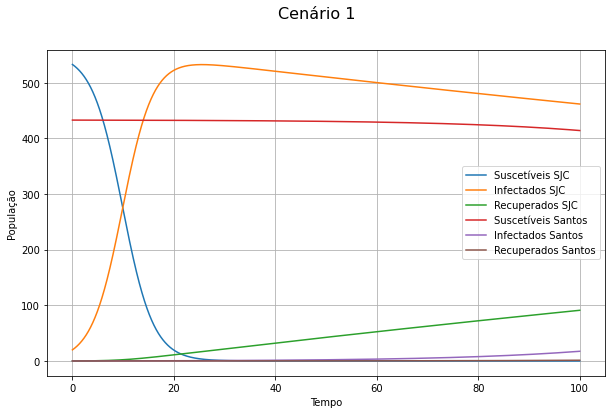

In [ ]:
t = np.linspace(0, 100, 10000)

IM1 = 0.7
IM2 = 0.4

s0 = scipy.integrate.odeint(ModeloSIR, [inicial[0][0], inicial[0][1], inicial[0][2]], t,
                           args=(taxa[0][0], taxa[0][1], taxa[1][1], IM1, taxa[2][1], IM2))

s0 = np.array(s0)

s1 = scipy.integrate.odeint(ModeloSIR, [inicial[7][0], inicial[7][1], inicial[7][2]], t,
                           args=(taxa[7][0], taxa[7][1], taxa[8][1], IM1, taxa[9][1], IM2))

s1 = np.array(s1)

plt.figure(figsize=[10,6])
plt.plot(t, s0[:,0], label="Suscetíveis SJC")
plt.plot(t, s0[:,1], label="Infectados SJC")
plt.plot(t, s0[:,2], label="Recuperados SJC")
plt.plot(t, s1[:,0], label="Suscetíveis Santos")
plt.plot(t, s1[:,1], label="Infectados Santos")
plt.plot(t, s1[:,2], label="Recuperados Santos")
plt.legend()
plt.grid()
plt.xlabel("Tempo")
plt.ylabel("População")
plt.suptitle('Cenário 1', fontsize=16)
#plt.ylim(0,6)

plt.show()

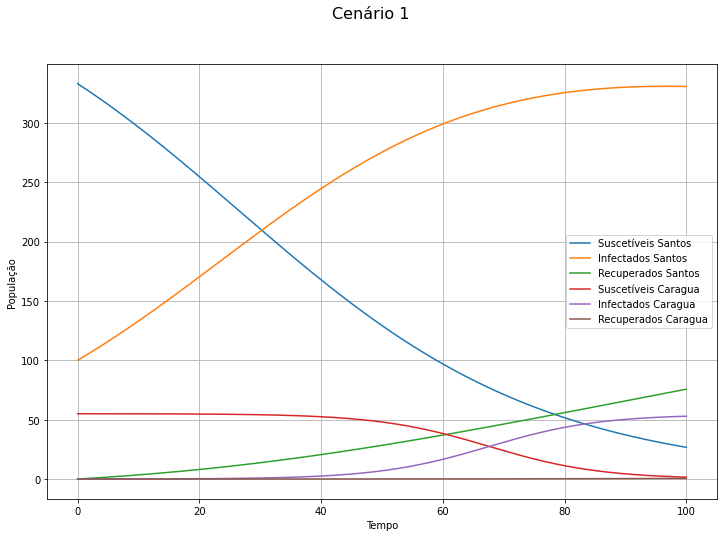

In [ ]:
t = np.linspace(0, 100, 10000)

IM1 = 0.7
IM2 = 0.4

s0 = scipy.integrate.odeint(ModeloSIR, [inicial[7][0]-100, 100, inicial[7][2]], t,
                           args=(taxa[7][0], taxa[7][1], taxa[8][1], IM1, taxa[9][1], IM2))
s0 = np.array(s0)

s1 = scipy.integrate.odeint(ModeloSIR, [inicial[9][0], inicial[9][1], inicial[9][2]], t,
                           args=(taxa[9][2], taxa[9][3], taxa[9][3], IM1, taxa[9][3], IM2))

s1 = np.array(s1)

plt.figure(figsize=[12,8])
plt.plot(t, s0[:,0], label="Suscetíveis Santos")
plt.plot(t, s0[:,1], label="Infectados Santos")
plt.plot(t, s0[:,2], label="Recuperados Santos")
plt.plot(t, s1[:,0], label="Suscetíveis Caragua")
plt.plot(t, s1[:,1], label="Infectados Caragua")
plt.plot(t, s1[:,2], label="Recuperados Caragua")
plt.legend()
plt.grid()
plt.xlabel("Tempo")
plt.ylabel("População")
plt.suptitle('Cenário 1', fontsize=16)
#plt.ylim(0,6)

plt.show()